# Test Random Forest & KNN Models with Data Normalization

#### Declare Dependencies


In [ ]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


#### Read Input File and Create DataFrame.

In [251]:
# Read cvs file
owell_data = pd.read_csv('Volve_Production_Data_Cleaned.csv',sep=',',encoding = "ISO-8859-1")
owell_data.head()



,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_Choke_Size,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,23-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,270.240,...,%,99.187,60.757,70.627,1166,165720,0,NaN,production,OP
1,24-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,262.843,...,%,94.601,63.047,66.049,1550,221707,0,NaN,production,OP
2,25-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,255.527,...,%,89.988,64.547,61.405,1249,178064,0,NaN,production,OP
3,26-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,247.199,...,%,84.777,65.724,56.148,1346,192602,0,NaN,production,OP
4,27-Apr-14,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,240.736,...,%,80.837,66.934,52.202,1350,194496,0,NaN,production,OP


#### Change Date Format to YYYY-MM-DD.

In [252]:

owell_data['DATEPRD'] = pd.to_datetime(owell_data['DATEPRD'],errors='coerce')
owell_data.head()



,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_Choke_Size,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-23,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,270.240,...,%,99.187,60.757,70.627,1166,165720,0,NaN,production,OP
1,2014-04-24,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,262.843,...,%,94.601,63.047,66.049,1550,221707,0,NaN,production,OP
2,2014-04-25,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,255.527,...,%,89.988,64.547,61.405,1249,178064,0,NaN,production,OP
3,2014-04-26,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,247.199,...,%,84.777,65.724,56.148,1346,192602,0,NaN,production,OP
4,2014-04-27,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÂRSK INSPIRER,24.0,240.736,...,%,80.837,66.934,52.202,1350,194496,0,NaN,production,OP


In [253]:
owell_data.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_Choke_Size', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

#### Fill NaN values with 0.

In [254]:
owell_data = owell_data.fillna(0)

In [255]:
owell_data['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5769])

In [256]:
data_well1 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 7405]
data_well2 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 7078]
data_well3 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 5599]
data_well4 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 5351]
data_well5 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 7289]
data_well6 = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == 5769]

data_well1.count()

AVG_WHT_P                   434
AVG_WHP_P                   434
DP_Choke_Size               434
AVG_DOWNHOLE_PRESSURE       434
AVG_DOWNHOLE_TEMPERATURE    434
BORE_OIL_VOL                434
dtype: int64

In [257]:
target_oil = data_well1['BORE_OIL_VOL'].values.reshape(-1,1)
# target_gas = data_well1['BORE_GAS_VOL']
# target_water = data_well1['BORE_WAT_VOL']
#target_oil


In [258]:
X1 = data_well1.iloc[:,data_well1.columns != 'BORE_OIL_VOL']
y1 = data_well1.iloc[:,data_well1.columns == 'BORE_OIL_VOL']

X2 = data_well2.iloc[:,data_well2.columns != 'BORE_OIL_VOL']
y2 = data_well2.iloc[:,data_well2.columns == 'BORE_OIL_VOL']

X3 = data_well3.iloc[:,data_well3.columns != 'BORE_OIL_VOL']
y3 = data_well3.iloc[:,data_well3.columns == 'BORE_OIL_VOL']

X4 = data_well4.iloc[:,data_well4.columns != 'BORE_OIL_VOL']
y4 = data_well4.iloc[:,data_well4.columns == 'BORE_OIL_VOL']

X5 = data_well5.iloc[:,data_well5.columns != 'BORE_OIL_VOL']
y5 = data_well5.iloc[:,data_well5.columns == 'BORE_OIL_VOL']

X6 = data_well6.iloc[:,data_well6.columns != 'BORE_OIL_VOL']
y6 = data_well6.iloc[:,data_well6.columns == 'BORE_OIL_VOL']


y1 = y1.values.reshape(-1,1)
y2 = y2.values.reshape(-1,1)
y3 = y3.values.reshape(-1,1)
y4 = y4.values.reshape(-1,1)
y5 = y5.values.reshape(-1,1)
y6 = y6.values.reshape(-1,1)

In [259]:

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.40, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.40, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.40, random_state = 42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.40, random_state = 42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y5,test_size=0.40, random_state = 42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6,y6,test_size=0.40, random_state = 42)


In [260]:

# rf = RandomForestClassifier(random_state=42)
# rf = rf.fit(X_train, y_train)


In [261]:

# rf.score(X_train, y_train)


In [262]:

# rf.score(X_test, y_test)


In [263]:
# print(rf.score(X_test, y_test))

In [264]:
# features = X.columns
# sorted(zip(rf.feature_importances_, features), reverse=True)

#### Create Well Code List.

In [265]:
well_code = [7405, 7078, 5599, 5351, 7289, 5769]


## Apply Random Forest Classifier on each well data & Determine Feature Importance.

In [266]:
for i in well_code:
    data_well = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == i]
    
    X = data_well.iloc[:,data_well.columns != 'BORE_OIL_VOL']
    y = data_well.iloc[:,data_well.columns == 'BORE_OIL_VOL']
    
    y = y.values.reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state = 42)
    
    rf = RandomForestClassifier(random_state=42)
    rf = rf.fit(X_train, y_train)
    
    print(f"For Well Bore Code {i}:")
    print(f"Train Score: {rf.score(X_train, y_train)}")
    print(f"Test Score: {rf.score(X_test, y_test)}")
    
    features = X.columns
    print(f"Column Importance: {sorted(zip(rf.feature_importances_, features), reverse=True)}")
    print("-----------------------------------------------------------------------------------------")

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0

For Well Bore Code 7405:
Train Score: 0.9846153846153847
Test Score: 0.011494252873563218
Column Importance: [(0.20791438787132352, 'DP_Choke_Size'), (0.2070109479165346, 'AVG_WHP_P'), (0.19938275900176128, 'AVG_DOWNHOLE_TEMPERATURE'), (0.19712139117578584, 'AVG_DOWNHOLE_PRESSURE'), (0.18857051403459474, 'AVG_WHT_P')]
-----------------------------------------------------------------------------------------
For Well Bore Code 7078:
Train Score: 0.9821428571428571
Test Score: 0.015625
Column Importance: [(0.21126119385303488, 'AVG_DOWNHOLE_TEMPERATURE'), (0.1991772372303102, 'DP_Choke_Size'), (0.1985549130692902, 'AVG_WHT_P'), (0.19722840123892613, 'AVG_DOWNHOLE_PRESSURE'), (0.1937782546084386, 'AVG_WHP_P')]
-----------------------------------------------------------------------------------------


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For Well Bore Code 5599:
Train Score: 0.9770453207769276
Test Score: 0.018518518518518517
Column Importance: [(0.29447174508371793, 'AVG_WHP_P'), (0.29140164531025325, 'DP_Choke_Size'), (0.282590669764394, 'AVG_WHT_P'), (0.06702791606777089, 'AVG_DOWNHOLE_PRESSURE'), (0.06450802377386387, 'AVG_DOWNHOLE_TEMPERATURE')]
-----------------------------------------------------------------------------------------


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For Well Bore Code 5351:
Train Score: 0.9791538933169834
Test Score: 0.02849264705882353
Column Importance: [(0.20585753547334873, 'AVG_DOWNHOLE_PRESSURE'), (0.20284340786753102, 'AVG_WHT_P'), (0.20145341305779113, 'DP_Choke_Size'), (0.19515084135545105, 'AVG_DOWNHOLE_TEMPERATURE'), (0.1946948022458781, 'AVG_WHP_P')]
-----------------------------------------------------------------------------------------
For Well Bore Code 7289:
Train Score: 0.9718004338394793
Test Score: 0.06168831168831169
Column Importance: [(0.21389688076733587, 'DP_Choke_Size'), (0.2057998789966186, 'AVG_DOWNHOLE_TEMPERATURE'), (0.2044073701049621, 'AVG_WHP_P'), (0.2012515554121292, 'AVG_WHT_P'), (0.17464431471895417, 'AVG_DOWNHOLE_PRESSURE')]
-----------------------------------------------------------------------------------------
For Well Bore Code 5769:
Train Score: 0.9583333333333334
Test Score: 0.04081632653061224
Column Importance: [(0.363562609907835, 'AVG_WHT_P'), (0.32785506780601853, 'AVG_WHP_P'), (0.30

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0

## Test KNN Model & Calculate Test Accuracy

In [267]:
well_data = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']]


In [268]:
Xknn = well_data.iloc[:,well_data.columns != 'BORE_OIL_VOL']
yknn = well_data.iloc[:,well_data.columns == 'BORE_OIL_VOL']

In [269]:
#yknn = yknn.values.reshape(-1,1)



In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


#### Split Data into Test Data and Train Data.

In [271]:
Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn, yknn, test_size=0.30, random_state=41)


#### Use Standard Scaler Transformation.

In [272]:

Xknn_scaler = StandardScaler().fit(Xknn_train)
Xknn_train_scaled = Xknn_scaler.transform(Xknn_train)
Xknn_test_scaled = Xknn_scaler.transform(Xknn_test)


### Fit the Train Data for K=3 value.

In [273]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xknn_train_scaled, yknn_train)
print('k=3 Test Acc: %.3f' % knn.score(Xknn_test_scaled, yknn_test))


k=3 Test Acc: 0.022


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Prediction Accuracy on Test Data is very low = 0.022

## Plot the Train and Test score error.

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 0.997/0.030
k: 2, Train/Test Score: 0.528/0.026


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.368/0.022


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 4, Train/Test Score: 0.288/0.020


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.242/0.015


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 6, Train/Test Score: 0.210/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.194/0.013


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 8, Train/Test Score: 0.178/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.166/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 10, Train/Test Score: 0.153/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.149/0.013


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 12, Train/Test Score: 0.142/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.134/0.011


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 14, Train/Test Score: 0.130/0.011


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.126/0.011


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 16, Train/Test Score: 0.122/0.010


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.117/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 18, Train/Test Score: 0.113/0.012


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.110/0.013


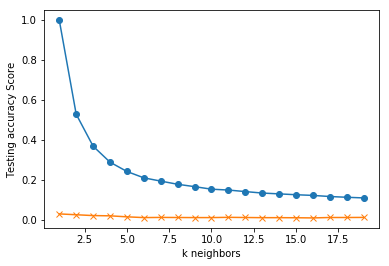

In [274]:
train_scores = []
test_scores = []

for k in range(1, 20, 1):
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xknn_train_scaled, yknn_train)
    
    #Score with both test and train data
    train_score = knn.score(Xknn_train_scaled, yknn_train)
    test_score = knn.score(Xknn_test_scaled, yknn_test)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 20, 1), train_scores, marker='o')
plt.plot(range(1, 20, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

### ADABOOST

In [275]:
from sklearn.ensemble import AdaBoostClassifier

In [276]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [277]:
clf.fit(Xknn_train, yknn_train)

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=0)

In [278]:
clf.score(Xknn_train, yknn_train)

0.007325352867607647

In [280]:
clf.score(Xknn_test, yknn_test)

0.004168403501458941

## Data Normalization using Log Conversion

In [281]:
import numpy as np
# well_data1 = well_data.dropna(0)


In [282]:
well_data1 = pd.read_csv('Volve_Production_Data_Cleaned.csv',sep=',',encoding = "ISO-8859-1")
well_data1 = well_data1[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']]


In [283]:
# well_data1 = well_data1.dropna(how="all")
# well_data1.isna()

In [284]:
well_data1 = well_data1.fillna(0)
well_data1

,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL
0,60.757,99.187,70.627,270.240,107.644,1166
1,63.047,94.601,66.049,262.843,107.869,1550
2,64.547,89.988,61.405,255.527,107.971,1249
3,65.724,84.777,56.148,247.199,108.052,1346
4,66.934,80.837,52.202,240.736,108.054,1350
5,67.848,77.338,48.708,235.021,108.042,1346
6,65.707,75.949,47.376,232.744,107.988,1279
7,62.796,76.118,47.611,233.298,107.893,1226
8,62.377,74.690,46.196,231.089,107.877,1213
9,60.747,74.729,46.150,231.419,107.817,1074


In [285]:
well_data1['AVG_WHT_P'] = well_data1['AVG_WHT_P'].apply(lambda x: 0.0001 if x <= 0.000 else x)
well_data1['AVG_WHP_P'] = well_data1['AVG_WHP_P'].apply(lambda x: 0.0001 if x <= 0.000 else x)
well_data1['DP_Choke_Size'] = well_data1['DP_Choke_Size'].apply(lambda x: 0.0001 if x <= 0.000 else x)
well_data1['AVG_DOWNHOLE_PRESSURE'] = well_data1['AVG_DOWNHOLE_PRESSURE'].apply(lambda x: 0.0001 if x <= 0.000 else x)
well_data1['AVG_DOWNHOLE_TEMPERATURE'] = well_data1['AVG_DOWNHOLE_TEMPERATURE'].apply(lambda x: 0.0001 if x <= 0.000 else x)
well_data1['BORE_OIL_VOL'] = well_data1['BORE_OIL_VOL'].apply(lambda x: 0.0001 if x <= 0.000 else x)

well_data1

,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL
0,60.757,99.187,70.627,270.2400,107.6440,1166.0
1,63.047,94.601,66.049,262.8430,107.8690,1550.0
2,64.547,89.988,61.405,255.5270,107.9710,1249.0
3,65.724,84.777,56.148,247.1990,108.0520,1346.0
4,66.934,80.837,52.202,240.7360,108.0540,1350.0
5,67.848,77.338,48.708,235.0210,108.0420,1346.0
6,65.707,75.949,47.376,232.7440,107.9880,1279.0
7,62.796,76.118,47.611,233.2980,107.8930,1226.0
8,62.377,74.690,46.196,231.0890,107.8770,1213.0
9,60.747,74.729,46.150,231.4190,107.8170,1074.0


#### Using log function create log DataFrame.

In [286]:
well_data_log = well_data1.apply(lambda x: np.log(x))

In [287]:
well_data_log.describe()

,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,4.282163,3.723817,2.115925,1.698402,1.082526,6.529791
std,0.463767,0.559457,1.310321,6.421205,6.058401,1.306605
min,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340,-9.210340
25%,4.264808,3.463875,1.210303,-9.210340,-9.210340,5.602119
50%,4.405188,3.642626,2.174638,5.435543,4.652936,6.572981
75%,4.482242,4.006460,3.177845,5.527820,4.666989,7.409136
max,4.538068,4.794873,4.663769,5.751868,4.686769,8.683047


In [291]:
### Random Forest
Xrdf = well_data_log.iloc[:,well_data_log.columns != 'BORE_OIL_VOL']
yrdf = well_data_log.iloc[:,well_data_log.columns == 'BORE_OIL_VOL']

yrdf = yrdf.values.reshape(-1,1)

yrdf = yrdf.astype('int')

print(Xrdf)
print("-------------------------------")
print(yrdf)

      AVG_WHT_P  AVG_WHP_P  DP_Choke_Size  AVG_DOWNHOLE_PRESSURE  \
0      4.106882   4.597007       4.257413               5.599310   
1      4.143880   4.549668       4.190397               5.571557   
2      4.167394   4.499676       4.117491               5.543328   
3      4.185464   4.440024       4.027991               5.510194   
4      4.203707   4.392435       3.955121               5.483701   
5      4.217270   4.348185       3.885843               5.459675   
6      4.185205   4.330062       3.858116               5.449939   
7      4.139891   4.332285       3.863064               5.452317   
8      4.133197   4.313346       3.832893               5.442803   
9      4.106718   4.313868       3.831897               5.444230   
10     4.104757   4.306225       3.822820               5.441404   
11     4.065242   4.302821       3.817515               5.440667   
12     4.005604   4.290377       3.796590               5.435572   
13     4.075552   4.262004       3.748327       

In [292]:

Xrdf_train, Xrdf_test, yrdf_train, yrdf_test = train_test_split(Xrdf, yrdf, test_size=0.70, random_state=42)

print(Xrdf_train)
print(yrdf_train)

      AVG_WHT_P  AVG_WHP_P  DP_Choke_Size  AVG_DOWNHOLE_PRESSURE  \
6882   4.471319   3.370773       0.392042               5.585063   
6624   4.458849   3.424426       0.774266               5.580122   
4049   4.396570   3.377861      -0.466809              -9.210340   
3485   4.478041   3.491739       1.435085              -9.210340   
2474   4.481046   4.009948       3.117861               5.603564   
5238   4.509078   3.676351       2.260617               5.487428   
3873   4.289884   3.959384       3.168424              -9.210340   
1198   4.363290   3.622205       2.151413               5.392322   
4181   4.370093   3.329988       0.093490              -9.210340   
1518   4.420309   3.284963       1.135587               5.530131   
6637   4.483511   3.430141       0.806476               5.581430   
5477   4.499610   3.606964       2.002560               5.498139   
1799   4.314457   4.277416       3.685900               5.458611   
1014   4.298033   3.950878       3.143980       

In [293]:
rf = RandomForestClassifier(random_state=42)
rf = rf.fit(Xrdf_train, yrdf_train)


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [294]:
rf.score(Xrdf_train, yrdf_train)

0.994161801501251

In [295]:
rf.score(Xrdf_test, yrdf_test)

0.8767416934619507

In [296]:
rf_df = pd.DataFrame(rf.predict(Xrdf_test))

In [297]:
rf_df.head()

,0
0,7
1,7
2,5
3,5
4,4


In [298]:
print(yrdf_test)

[[7]
 [7]
 [5]
 ...
 [6]
 [6]
 [5]]


In [299]:
well_data1['BORE_OIL_LABEL'] = well_data1['BORE_OIL_VOL'].apply(lambda x: 0 if x == 0 else 1 if x <= 250 else 2 
                                                                if x <= 500 else 3 if x <= 750 else 4 if x <= 1000 else 5
                                                               if x <= 1250 else 6 if x <= 1500 else 7 if x <= 1750 else 8
                                                               if x <= 2000 else 9 if x <= 2250 else 10 if x <= 2500 else 11
                                                               if x <= 2750 else 12 if x <= 3000 else 13 if x <= 3250 else 14
                                                               if x <= 3500 else 15 if x <= 3750 else 16 if x <= 4000 else 17
                                                               if x <= 4250 else 18 if x <= 4500 else 19 if x <= 4750 else 20
                                                               if x <= 5000 else 21 if x <= 5250 else 21 if x <= 5500 else 22
                                                               if x <= 5750 else 23 if x <= 6000 else 24 if x <= 6250 else x
                                                               )

In [300]:
well_data1.head()

,AVG_WHT_P,AVG_WHP_P,DP_Choke_Size,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_OIL_LABEL
0,60.757,99.187,70.627,270.240,107.644,1166.0,5
1,63.047,94.601,66.049,262.843,107.869,1550.0,7
2,64.547,89.988,61.405,255.527,107.971,1249.0,5
3,65.724,84.777,56.148,247.199,108.052,1346.0,6
4,66.934,80.837,52.202,240.736,108.054,1350.0,6


In [301]:
well_data1.columns

Index(['AVG_WHT_P', 'AVG_WHP_P', 'DP_Choke_Size', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'BORE_OIL_VOL', 'BORE_OIL_LABEL'],
      dtype='object')

In [302]:
Xknn1 = well_data1[['AVG_WHT_P', 'AVG_WHP_P', 'DP_Choke_Size', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE']]
yknn1 = well_data1['BORE_OIL_LABEL']


In [303]:
Xknn1_train, Xknn1_test, yknn1_train, yknn1_test = train_test_split(Xknn1, yknn1, test_size=0.70, random_state=41)

Xknn1_scaler = StandardScaler().fit(Xknn1_train)
Xknn1_train_scaled = Xknn1_scaler.transform(Xknn1_train)
Xknn1_test_scaled = Xknn1_scaler.transform(Xknn1_test)


In [304]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xknn1_train_scaled, yknn1_train)
print('k=3 Test Acc: %.3f' % knn.score(Xknn1_test_scaled, yknn1_test))


k=3 Test Acc: 0.677


k: 1, Train/Test Score: 1.000/0.693
k: 2, Train/Test Score: 0.861/0.668
k: 3, Train/Test Score: 0.824/0.677
k: 4, Train/Test Score: 0.792/0.675
k: 5, Train/Test Score: 0.786/0.673
k: 6, Train/Test Score: 0.767/0.663
k: 7, Train/Test Score: 0.757/0.661
k: 8, Train/Test Score: 0.742/0.659
k: 9, Train/Test Score: 0.736/0.655
k: 10, Train/Test Score: 0.717/0.652
k: 11, Train/Test Score: 0.717/0.655
k: 12, Train/Test Score: 0.716/0.649
k: 13, Train/Test Score: 0.712/0.647
k: 14, Train/Test Score: 0.702/0.645
k: 15, Train/Test Score: 0.695/0.644
k: 16, Train/Test Score: 0.693/0.640
k: 17, Train/Test Score: 0.693/0.639
k: 18, Train/Test Score: 0.692/0.632
k: 19, Train/Test Score: 0.685/0.633
k: 20, Train/Test Score: 0.682/0.627
k: 21, Train/Test Score: 0.679/0.624
k: 22, Train/Test Score: 0.670/0.624
k: 23, Train/Test Score: 0.668/0.619
k: 24, Train/Test Score: 0.665/0.617
k: 25, Train/Test Score: 0.663/0.615
k: 26, Train/Test Score: 0.659/0.607
k: 27, Train/Test Score: 0.651/0.607
k: 28, Tra

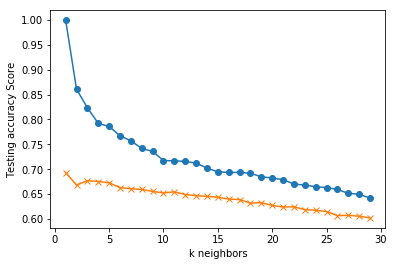

In [305]:
train_scores = []
test_scores = []

for k in range(1, 30, 1):
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xknn1_train_scaled, yknn1_train)
    
    #Score with both test and train data
    train_score = knn.score(Xknn1_train_scaled, yknn1_train)
    test_score = knn.score(Xknn1_test_scaled, yknn1_test)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 30, 1), train_scores, marker='o')
plt.plot(range(1, 30, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [306]:
for i in well_code:
    data_well = owell_data[['AVG_WHT_P','AVG_WHP_P','DP_Choke_Size','AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']][owell_data['NPD_WELL_BORE_CODE'] == i]
    
    X = data_well.iloc[:,data_well.columns != 'BORE_OIL_VOL']
    y = data_well.iloc[:,data_well.columns == 'BORE_OIL_VOL']
    
    y = y.values.reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state = 42)
    
    rf = RandomForestClassifier(random_state=42)
    rf = rf.fit(X_train, y_train)
    
    print(f"For Well Bore Code {i}:")
    print(f"Train Score: {rf.score(X_train, y_train)}")
    print(f"Test Score: {rf.score(X_test, y_test)}")
    
    features = X.columns
    print(f"Column Importance: {sorted(zip(rf.feature_importances_, features), reverse=True)}")
    print("-----------------------------------------------------------------------------------------")

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0

For Well Bore Code 7405:
Train Score: 0.9846153846153847
Test Score: 0.011494252873563218
Column Importance: [(0.20791438787132352, 'DP_Choke_Size'), (0.2070109479165346, 'AVG_WHP_P'), (0.19938275900176128, 'AVG_DOWNHOLE_TEMPERATURE'), (0.19712139117578584, 'AVG_DOWNHOLE_PRESSURE'), (0.18857051403459474, 'AVG_WHT_P')]
-----------------------------------------------------------------------------------------
For Well Bore Code 7078:
Train Score: 0.9821428571428571
Test Score: 0.015625
Column Importance: [(0.21126119385303488, 'AVG_DOWNHOLE_TEMPERATURE'), (0.1991772372303102, 'DP_Choke_Size'), (0.1985549130692902, 'AVG_WHT_P'), (0.19722840123892613, 'AVG_DOWNHOLE_PRESSURE'), (0.1937782546084386, 'AVG_WHP_P')]
-----------------------------------------------------------------------------------------


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For Well Bore Code 5599:
Train Score: 0.9770453207769276
Test Score: 0.018518518518518517
Column Importance: [(0.29447174508371793, 'AVG_WHP_P'), (0.29140164531025325, 'DP_Choke_Size'), (0.282590669764394, 'AVG_WHT_P'), (0.06702791606777089, 'AVG_DOWNHOLE_PRESSURE'), (0.06450802377386387, 'AVG_DOWNHOLE_TEMPERATURE')]
-----------------------------------------------------------------------------------------


/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


For Well Bore Code 5351:
Train Score: 0.9791538933169834
Test Score: 0.02849264705882353
Column Importance: [(0.20585753547334873, 'AVG_DOWNHOLE_PRESSURE'), (0.20284340786753102, 'AVG_WHT_P'), (0.20145341305779113, 'DP_Choke_Size'), (0.19515084135545105, 'AVG_DOWNHOLE_TEMPERATURE'), (0.1946948022458781, 'AVG_WHP_P')]
-----------------------------------------------------------------------------------------
For Well Bore Code 7289:
Train Score: 0.9718004338394793
Test Score: 0.06168831168831169
Column Importance: [(0.21389688076733587, 'DP_Choke_Size'), (0.2057998789966186, 'AVG_DOWNHOLE_TEMPERATURE'), (0.2044073701049621, 'AVG_WHP_P'), (0.2012515554121292, 'AVG_WHT_P'), (0.17464431471895417, 'AVG_DOWNHOLE_PRESSURE')]
-----------------------------------------------------------------------------------------
For Well Bore Code 5769:
Train Score: 0.9583333333333334
Test Score: 0.04081632653061224
Column Importance: [(0.363562609907835, 'AVG_WHT_P'), (0.32785506780601853, 'AVG_WHP_P'), (0.30

/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/wandabaghel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0

## Testing Ridge Linear Regression Model (L2) and Calculate R2 Square Values.

In [307]:
data3 = owell_data[['AVG_WHT_P','AVG_WHP_P','AVG_CHOKE_SIZE_P',
              'AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL']]

In [308]:
rX = data3.iloc[:,data3.columns != 'BORE_OIL_VOL']
ry = data3.iloc[:,data3.columns == 'BORE_OIL_VOL']


### Define Linear Regression Classifier.

In [311]:
from sklearn import linear_model

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))


In [312]:
# Columns.
rX.columns


Index(['AVG_WHT_P', 'AVG_WHP_P', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE'],
      dtype='object')

In [313]:
# Decalre Column List.
col_list = ['AVG_WHT_P', 'AVG_WHP_P', 'AVG_CHOKE_SIZE_P', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE']


### Plot Ridge Regression Mean Error and R2 Square.

(4797, 1)


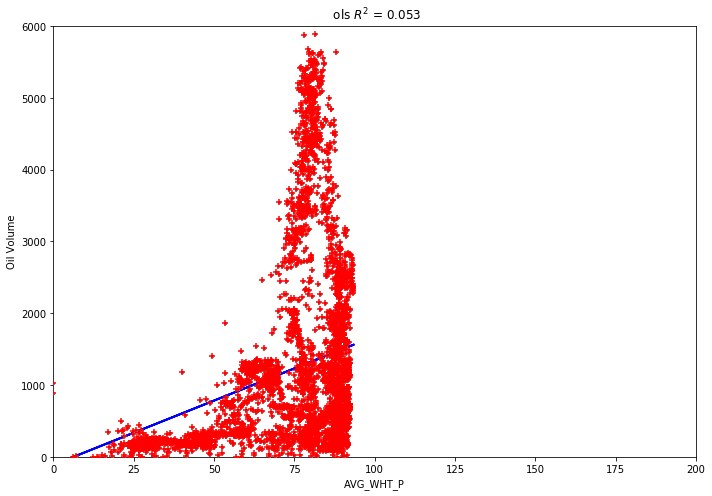

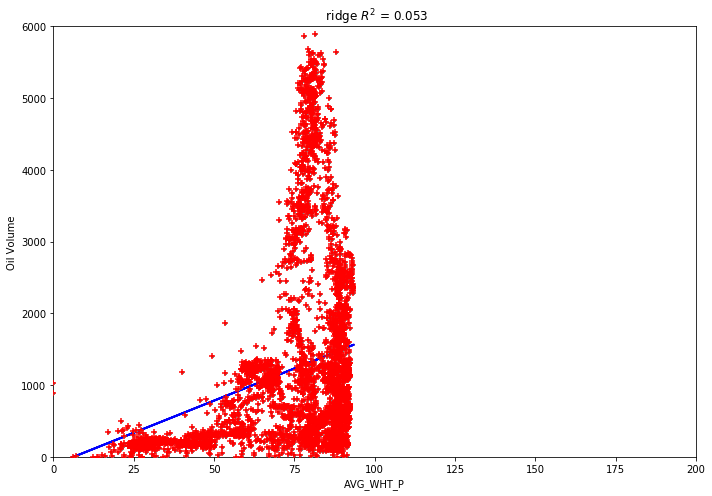

(4797, 1)


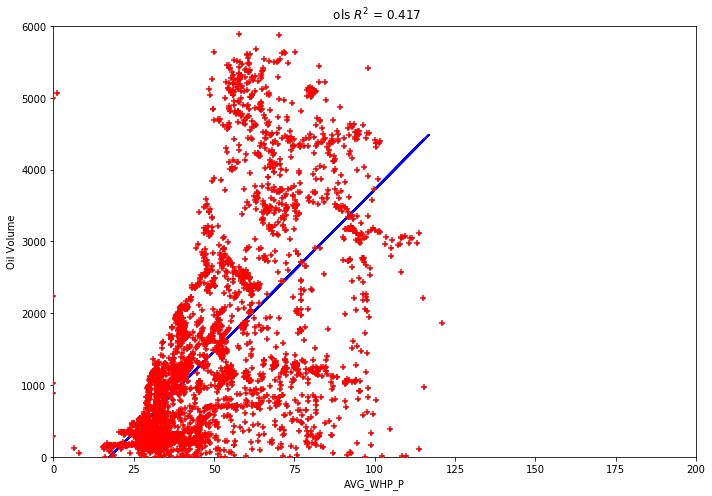

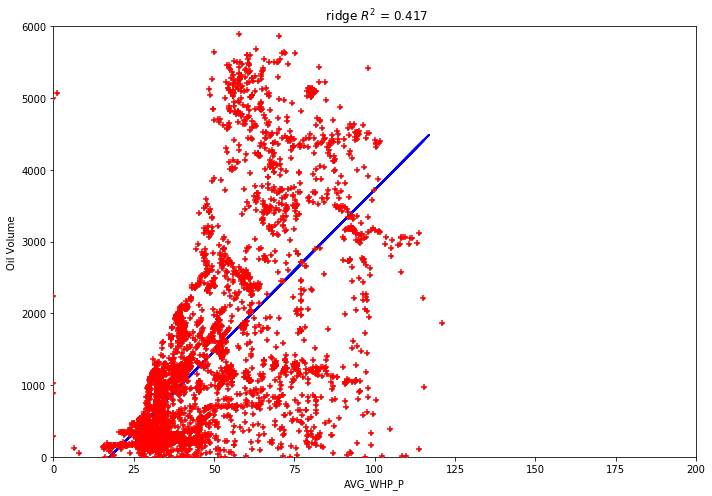

(4797, 1)


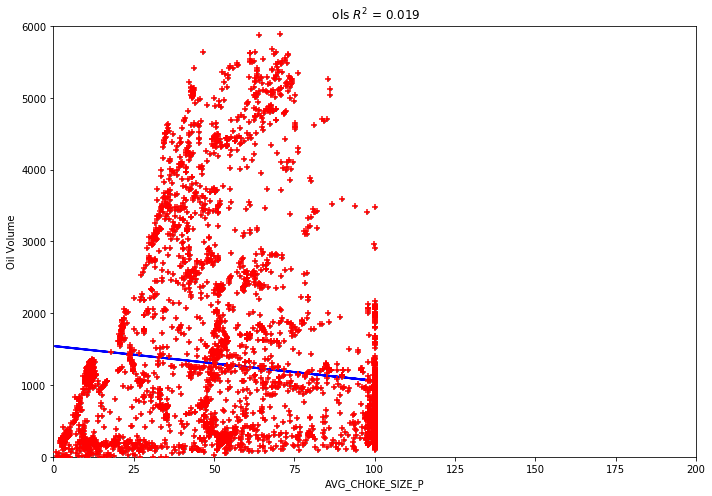

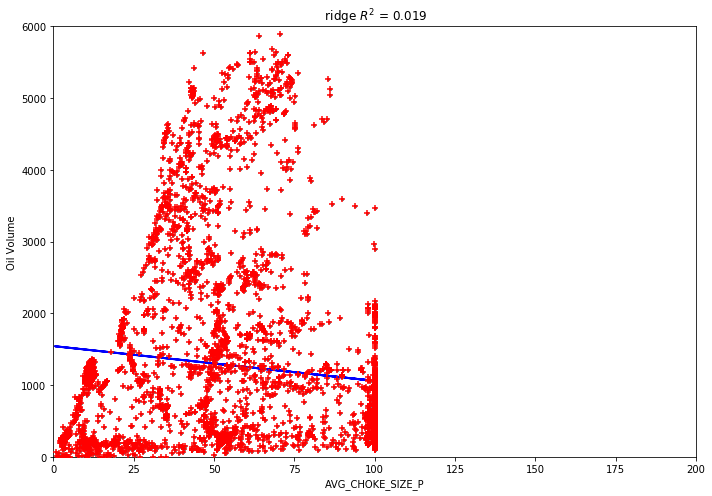

(4797, 1)


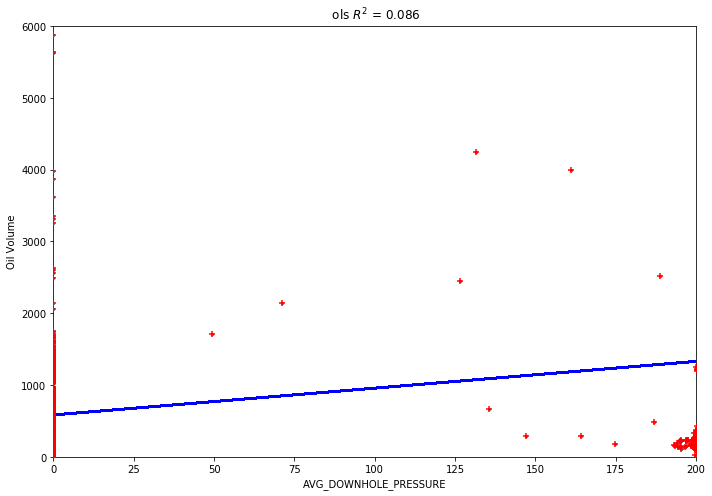

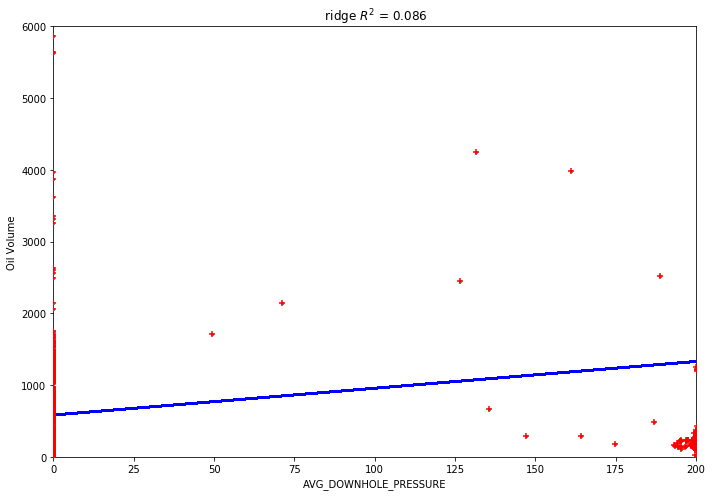

(4797, 1)


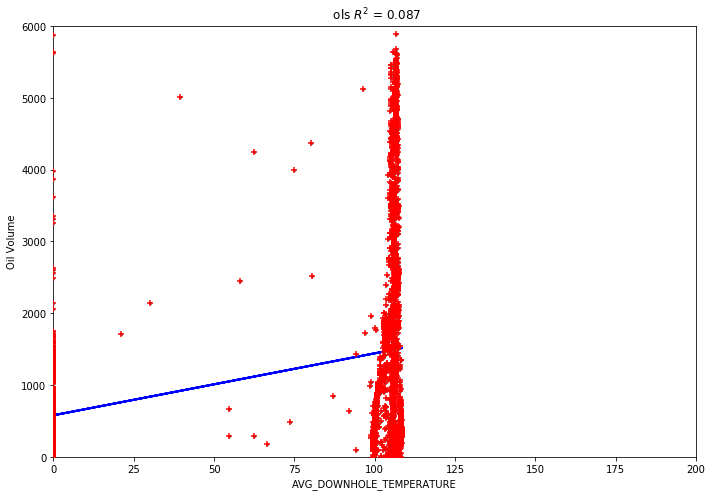

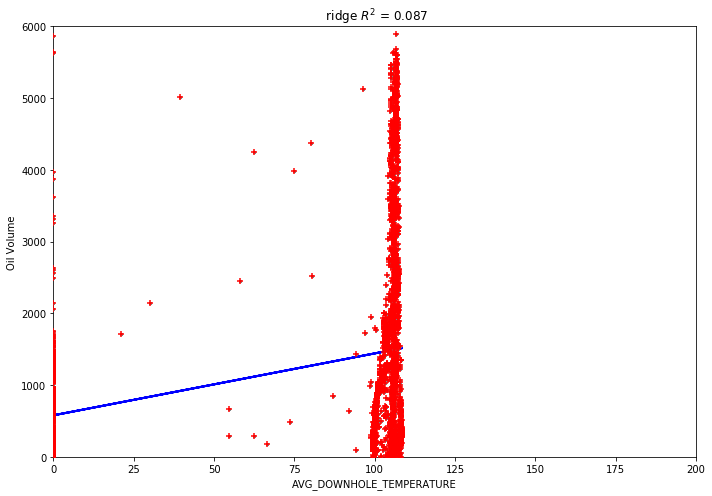

In [315]:
from sklearn.metrics import r2_score

for i in col_list:
    xR = rX[i].values.reshape(-1,1)
    
    rX_train, rX_test, ry_train, ry_test = train_test_split(xR,ry,test_size=0.40, random_state = 42)
    #rX_train = rX_train.reshape(-1,1)
    rX_shape = rX_train.shape
    
    print(rX_shape)
    
    for name, clf in classifiers.items():
        fig, ax = plt.subplots(figsize=(10, 7))

        for _ in range(6):
            this_X = .1 * np.random.normal(size=rX_shape) + rX_train
            #clf.fit(this_X, ry_train)
            clf.fit(rX_train, ry_train)
            pred_ry = clf.predict(rX_test)
            r2_score_ridge = r2_score(ry_test, pred_ry)

            ax.plot(rX_test, clf.predict(rX_test), color='gray')
            #ax.scatter(this_X, ry_train, s=3, c='gray', marker='o', zorder=10)
            ax.scatter(rX_train, ry_train, s=3, c='gray', marker='o', zorder=10)

        clf.fit(rX_train, ry_train)
        ax.plot(rX_test, clf.predict(rX_test), linewidth=2, color='blue')
        ax.scatter(rX_train, ry_train, s=30, c='red', marker='+', zorder=10)

        ax.set_title(f" {name} $R^2$ = %.3f" %(r2_score_ridge))
        ax.set_xlim(0, 200)
        ax.set_ylim((0, 6000))
        ax.set_xlabel(i)
        ax.set_ylabel('Oil Volume')

        fig.tight_layout()
        plt.savefig(f"RidgeRegression for feature {i}")

    plt.show()